In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
# import seaborn and matplotlib for charting and data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#import plotly and cufflinks for interactive visualisations
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# To import csv file containing fundamental data downloaded from S&P Capital IQ, as well as other features and the labels for machine learning.
stockdata = pd.read_csv('cleaned stockdata.csv', index_col=0)

In [5]:
stockdata=pd.get_dummies(data=stockdata, columns=['Sector', 'Country.1','IQ_AUDITOR_OPINION'], drop_first=True, dummy_na=True).drop(['Country.1_nan','IQ_AUDITOR_OPINION_nan'],axis=1)

In [6]:
#To create a categorical variable based on effective annual return.
stockdata['Positive or negative returns'] = [1 if x >= 0 else 0 for x in stockdata['Effective annual return']]

# Support Vector Classification

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1), 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [9]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(scaled_features,y_train)

SVC()

In [10]:
predictions = svc_model.predict(scaler.transform(X_test))

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.22      0.32       205
           1       0.79      0.95      0.86       647

    accuracy                           0.77       852
   macro avg       0.69      0.59      0.59       852
weighted avg       0.74      0.77      0.73       852



In [12]:
print(confusion_matrix(y_test,predictions))

[[ 45 160]
 [ 32 615]]


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf','poly','sigmoid']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(scaled_features,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [14]:
grid.best_estimator_

SVC(C=10, gamma=0.1, kernel='poly')

In [15]:
grid_predictions = grid.predict(scaler.transform(X_test))

In [16]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.65      0.30      0.41       205
           1       0.81      0.95      0.87       647

    accuracy                           0.79       852
   macro avg       0.73      0.62      0.64       852
weighted avg       0.77      0.79      0.76       852



In [17]:
print(confusion_matrix(y_test,grid_predictions))

[[ 61 144]
 [ 33 614]]


In [18]:
#Remove the dummy variables for Country.1 except for Country.1_United States
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Positive or negative returns'], test_size=0.30, 
                                                    random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf','poly','sigmoid']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(scaled_features,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [21]:
grid.best_estimator_

SVC(C=10, gamma=0.1, kernel='poly')

In [22]:
grid_predictions = grid.predict(scaler.transform(X_test))

In [23]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.57      0.20      0.30       205
           1       0.79      0.95      0.86       647

    accuracy                           0.77       852
   macro avg       0.68      0.58      0.58       852
weighted avg       0.74      0.77      0.73       852



In [24]:
print(confusion_matrix(y_test,grid_predictions))

[[ 41 164]
 [ 31 616]]


No further feature selection is performed as the model performs better with all dummy variables.

# Support Vector Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [27]:
from sklearn.svm import SVR

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf','poly','sigmoid']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(scaled_features,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [29]:
grid.best_estimator_

SVR(C=0.1, gamma=1)

In [30]:
predictions = grid.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

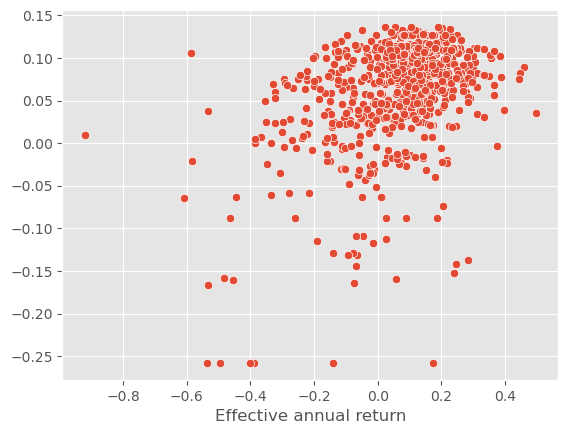

In [31]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

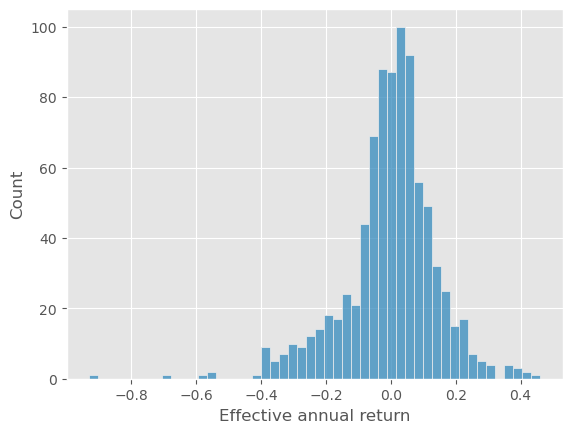

In [32]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [33]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10189660707797749
MSE: 0.02054238245932205
RMSE: 0.14332614018148276


In [34]:
#Remove the dummy variables for Country.1 except for Country.1_United States
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf','poly','sigmoid']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(scaled_features,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [37]:
grid.best_estimator_

SVR(C=1, gamma=0.1)

In [38]:
predictions = grid.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

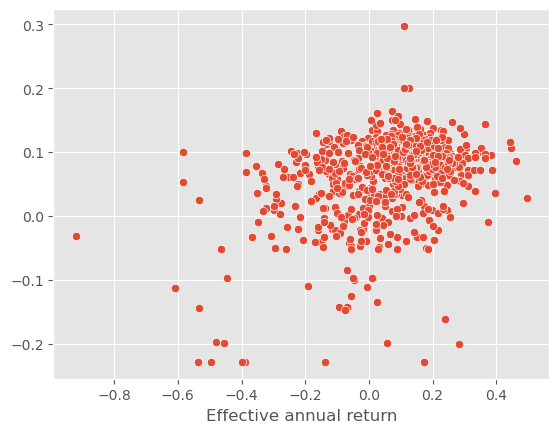

In [39]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

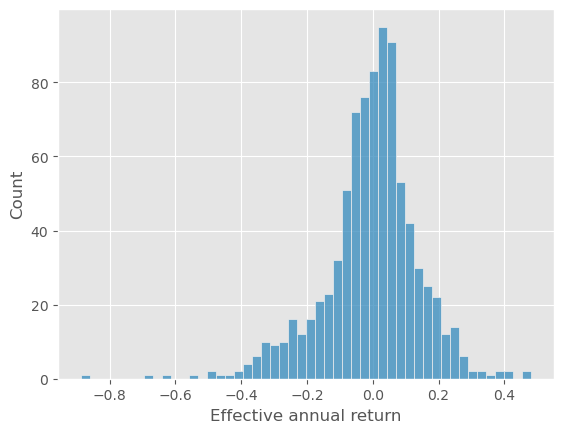

In [40]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1038813308312337
MSE: 0.021108359492155202
RMSE: 0.1452871621725581


**Variance Threshold**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [44]:
# To set variance threshold of 0.05.
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.05)
selector.fit(scaled_features)
pd.DataFrame(scaled_features,columns=stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1).columns).columns[selector.get_support()]

Index(['Sector_Consumer Discretionary', 'Sector_Finance', 'Sector_Health Care',
       'Sector_Industrials', 'Sector_Technology', 'Sector_nan',
       'Country.1_United States', 'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],
      dtype='object')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(stockdata[['Sector_Consumer Discretionary', 'Sector_Finance', 'Sector_Health Care',
       'Sector_Industrials', 'Sector_Technology', 'Sector_nan',
       'Country.1_United States', 'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language']], 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf','poly','sigmoid']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(scaled_features,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [48]:
grid.best_estimator_

SVR(C=1, gamma=0.1)

In [49]:
predictions = grid.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

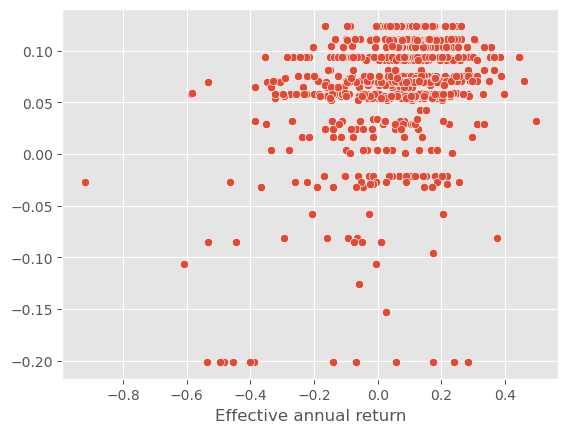

In [50]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

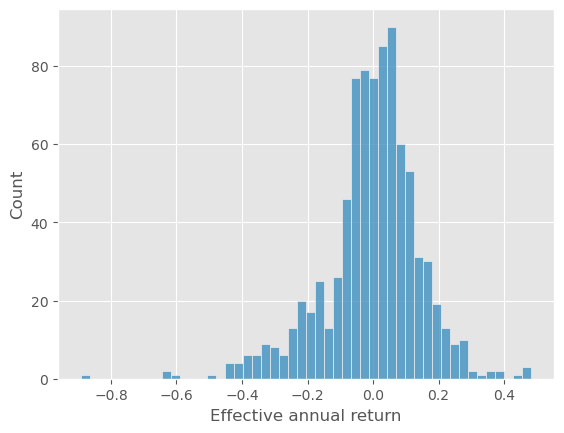

In [51]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10738183684501955
MSE: 0.022225141569390084
RMSE: 0.14908098996649466


**SelectKBest**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [55]:
#Select top 45 features based on mutual info regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k = 45)
selector.fit(scaled_features, y_train)
pd.DataFrame(scaled_features,columns=stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description','Positive or negative returns'],axis=1).columns).columns[selector.get_support()]

Index(['IQ_TOTAL_REV', 'IQ_RETURN_ASSETS', 'IQ_RETURN_EQUITY',
       'IQ_GROSS_MARGIN', 'IQ_EBITDA_MARGIN', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS',
       'IQ_CURRENT_RATIO', 'IQ_DAYS_INVENTORY_OUT', 'IQ_DAYS_PAYABLE_OUT',
       'IQ_TOTAL_DEBT_EQUITY', 'IQ_TOTAL_REV_1YR_ANN_GROWTH',
       'IQ_NI_1YR_ANN_GROWTH', 'IQ_TOTAL_ASSETS_1YR_ANN_GROWTH', 'IQ_EBITDA',
       'IQ_PAYOUT_RATIO', 'IQ_CASH_ST_INVEST', 'IQ_NPPE', 'IQ_GW', 'IQ_RE',
       'IQ_TBV', 'IQ_NET_DEBT', 'IQ_CONTINGENT_LIABILITIES', 'IQ_CASH_OPER',
       'IQ_CASH_INVEST', 'IQ_NET_CHANGE', 'Sector_Consumer Discretionary',
       'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Finance',
       'Sector_Health Care', 'Sector_Real Estate', 'Sector_Technology',
       'Country.1_Brazil', 'Country.1_Canada', 'Country.1_China',
       'Country.1_Greece', 'Country.1_Israel', 'Country.1_Japan',
       'Country.1_South Africa', 'Country.1_South Korea',
       'Country.1_United States', 'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDI

In [56]:
X_train, X_test, y_train, y_test = train_test_split(stockdata[['IQ_TOTAL_REV', 'IQ_RETURN_ASSETS', 'IQ_RETURN_EQUITY',
       'IQ_GROSS_MARGIN', 'IQ_EBITDA_MARGIN', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS',
       'IQ_CURRENT_RATIO', 'IQ_DAYS_INVENTORY_OUT', 'IQ_DAYS_PAYABLE_OUT',
       'IQ_TOTAL_DEBT_EQUITY', 'IQ_TOTAL_REV_1YR_ANN_GROWTH',
       'IQ_NI_1YR_ANN_GROWTH', 'IQ_CFO_1YR_ANN_GROWTH',
       'IQ_TOTAL_ASSETS_1YR_ANN_GROWTH', 'IQ_EBITDA', 'IQ_PAYOUT_RATIO',
       'IQ_CASH_ST_INVEST', 'IQ_NPPE', 'IQ_GW', 'IQ_RE', 'IQ_TBV',
       'IQ_NET_DEBT', 'IQ_CONTINGENT_LIABILITIES', 'IQ_CASH_OPER',
       'IQ_CASH_INVEST', 'IQ_NET_CHANGE', 'Sector_Consumer Discretionary',
       'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Finance',
       'Sector_Health Care', 'Sector_Real Estate', 'Sector_Technology',
       'Country.1_Canada', 'Country.1_China', 'Country.1_Greece',
       'Country.1_Israel', 'Country.1_Japan', 'Country.1_South Africa',
       'Country.1_South Korea', 'Country.1_United States',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language']], 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf','poly','sigmoid']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(scaled_features,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [59]:
grid.best_estimator_

SVR(C=1, gamma=0.1)

In [60]:
predictions = grid.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

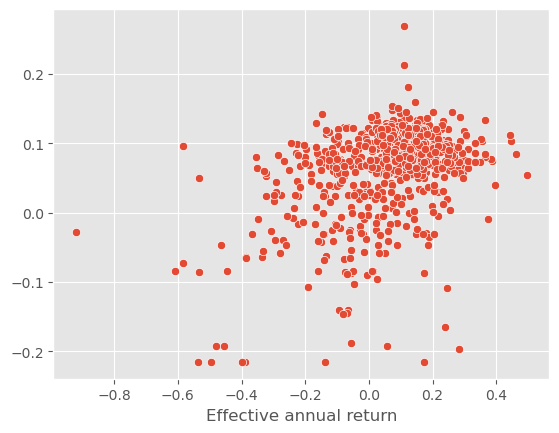

In [61]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

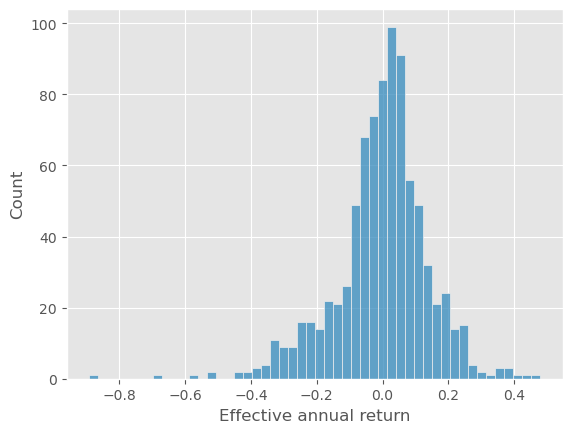

In [62]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10346729608271645
MSE: 0.020575014809071413
RMSE: 0.1434399344989791


In [67]:
y_test.mean()

0.06442245133568081

The support vector regressor's lowest RMSE of 0.143 is only slightly better than the linear regression model's lowest RMSE of 0.153. 

**Support Vector Classifier model metrics**

|**Features**|**Accuracy**|**Weight avg f1-score**|
|---------------------------|-----|---|
|C=1, gamma='scale', kernel='rbf', with all 91 features including all dummy variables|0.77|0.73|
|C=10, gamma=0.1, kernel='poly', with all 91 features including all dummy variables|**0.79**|**0.76**|
|C=10, gamma=0.1, kernel='poly', with Country.1 dummy variables removed except Country.1_United States (45 features)|0.77|0.73|

**Support Vector Regressor model metrics**

|**Features**|**RMSE**|
|---------------------------|-----|
|C=0.1, gamma=1, with all 91 features including all dummy variables|**0.14332614018148276**|
|C=0.1, gamma=1, with Country.1 dummy variables removed except Country.1_United States (45 features)|0.1452871621725581|
|C=1, gamma=0.1, with variance threshold feature selection, with all dummy variables (9 features)|0.14908098996649466|
|C=1, gamma=0.1, with SelectKBest feature selection using mutual info regression, with all dummy variables (45 features)|0.1434399344989791|